Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team.
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for
developing a AIML model which can predict the condition of the patient depending on the received test results.

To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Data Understanding

##1A 1B

In [ ]:
pre_df1 = pd.read_csv('/content/drive/MyDrive/GL AIML/Lab/Lab Datasets/Dataset/Part_1_Data/Normal.csv') #normal
pre_df2 = pd.read_csv('/content/drive/MyDrive/GL AIML/Lab/Lab Datasets/Dataset/Part_1_Data/Type_H.csv') #type_h
pre_df3 = pd.read_csv('/content/drive/MyDrive/GL AIML/Lab/Lab Datasets/Dataset/Part_1_Data/Type_S.csv') #type_s
print(pre_df1.shape ,pre_df2.shape ,pre_df3.shape )

(100, 7) (60, 7) (150, 7)


In [ ]:
print('Normal Df = ' ,list(pre_df1.columns))
print('type_h :' ,list(pre_df2.columns))
print('type_s :' ,list(pre_df3.columns))

Normal Df =  ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
type_h : ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']
type_s : ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree', 'Class']


##1C

In [ ]:
pre_df2.columns== pre_df3.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
pre_df1.columns == pre_df3.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [ ]:
pre_df1.columns == pre_df2.columns

array([ True,  True,  True,  True,  True,  True,  True])



*   all df have same columns names



##1d

In [ ]:
pre_df1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [ ]:
pre_df2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [ ]:
pre_df3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

##1E

In [ ]:
pre_df1['Class'].value_counts() #same meaning different characters

Normal    73
Nrmal     27
Name: Class, dtype: int64

In [ ]:
pre_df2['Class'].value_counts() #same meaning different characters

Type_H    37
type_h    23
Name: Class, dtype: int64

In [ ]:
pre_df3['Class'].value_counts() #same meaning different characters

Type_S    133
tp_s       17
Name: Class, dtype: int64

#Data Preparation and Exploration

##2A

In [ ]:
pre_df1['Class'] = np.where(pre_df1['Class']=='Nrmal','Normal',pre_df1['Class'])
pre_df1['Class'].value_counts()

Normal    100
Name: Class, dtype: int64

In [ ]:
pre_df2['Class'] = np.where(pre_df2['Class']=='type_h','Type_H',pre_df2['Class'])
pre_df2['Class'].value_counts()

Type_H    60
Name: Class, dtype: int64

In [ ]:
pre_df3['Class'] = np.where(pre_df3['Class']=='tp_s','Type_S',pre_df3['Class'])
pre_df3['Class'].value_counts()

Type_S    150
Name: Class, dtype: int64

##2B

In [ ]:
df = pd.merge(pre_df1,pre_df2,how = 'outer')
df = pd.merge(df,pre_df3,how = 'outer')
df.shape

(310, 7)

In [ ]:
df[df.index.duplicated()]

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class


In [ ]:
df = df.reset_index
df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [ ]:
df['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

##2C

In [ ]:
df.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
58,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H
60,51.311771,8.875541,57.000000,42.436230,126.472258,-2.144044,Normal
75,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,Type_S
13,55.512212,20.095157,44.000000,35.417055,122.648753,34.552946,Type_S
30,41.646916,8.835549,36.031975,32.811367,116.555168,-6.054538,Normal


##2D

In [ ]:
df.isnull().sum() * 100 / len(df)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

##2E

In [ ]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [ ]:
df = df.convert_dtypes()
df.dtypes

P_incidence    Float64
P_tilt         Float64
L_angle        Float64
S_slope        Float64
P_radius       Float64
S_Degree       Float64
Class           string
dtype: object

#Data Analysis

##3A

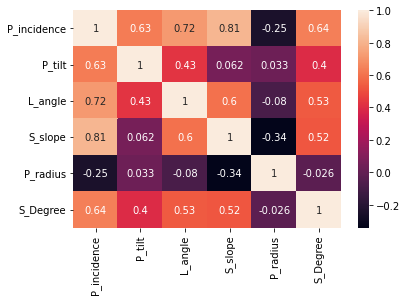

In [ ]:
sns.heatmap(df.corr(),annot=True)

##3B

all the features seems to have a good correlation except p_radius

*   Good Corr
>  1. P_tilt & P_incidence
>  2. L_angle & P_incidence
>  3. S_slope & P_incidence
>  4. S_degree & P_incidence
>  5. P_tilt & S_slope
>  6. L_angle & S_slope

* Weak Corr
> 1. P_radius & P_incidence
> 2. P_tilt & S_degree
> 3. P_tilt & L_angle
> 4. L_angle & P_radius
> 5. L_angle & s_degree
> 6. P_radius & S_degree
> 7. P_radius & S_slope

##3C

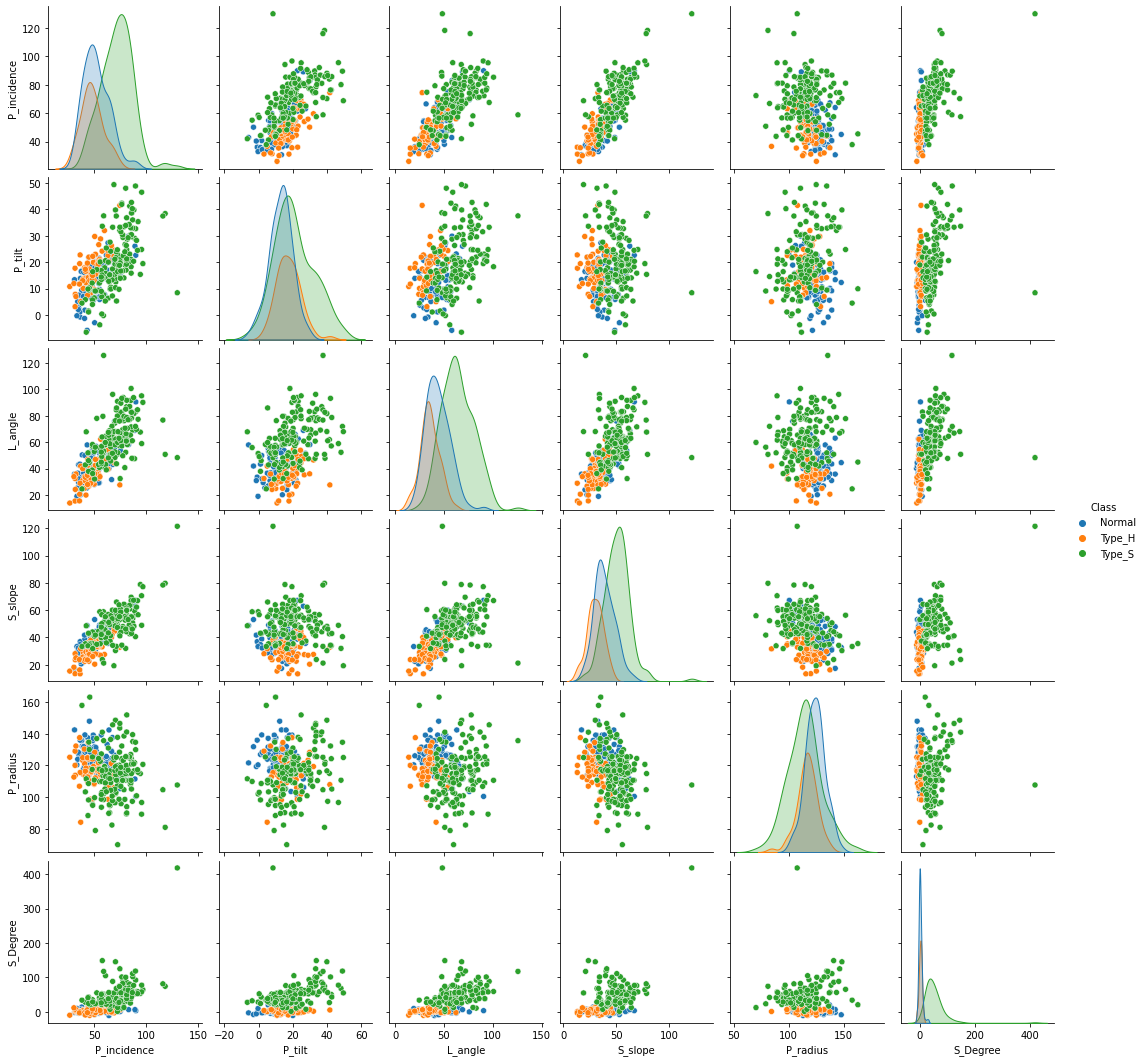

In [ ]:
sns.pairplot(df,hue='Class')



*   the distributions are not widely separated from each other, hence individually these features are not great predictors
*   Normal and Type_S clusters are not separated clearly, hence I can expect some misclassifications among these classes
*   some features seem to have correlation among themselves



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    Float64
 1   P_tilt       310 non-null    Float64
 2   L_angle      310 non-null    Float64
 3   S_slope      310 non-null    Float64
 4   P_radius     310 non-null    Float64
 5   S_Degree     310 non-null    Float64
 6   Class        310 non-null    string 
dtypes: Float64(6), string(1)
memory usage: 29.3 KB


##3D

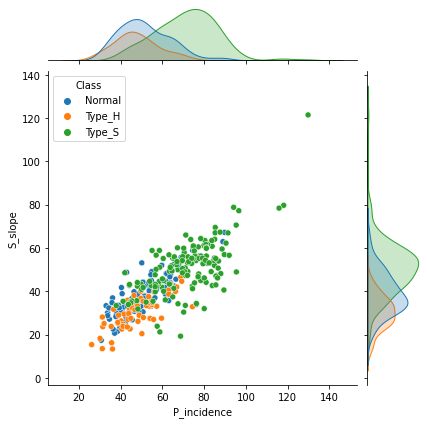

In [ ]:
sns.jointplot(data = df,x=df['P_incidence'],y=df['S_slope'],hue = df['Class'])

* They seem to have a positive correlation
* P_incidence is a poor predictor for Normal and Type_H class but S_slope seem to have a better edge because of slightly apprearing 3rd node
* Still most of the distributions are overlapping




##3E

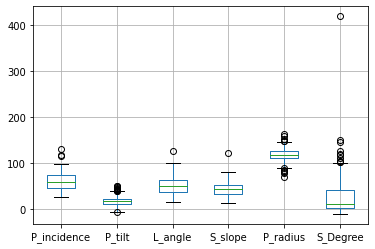

In [ ]:
df.boxplot()



*   all the features have outliers
*   P_tilt ,S_slope and S_degree seem to have a skews distribution



#Model Building

In [ ]:
df.shape

(310, 7)

##4A 4B

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:6],df.iloc[:,6], test_size=0.2, random_state=4320)
print(df.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(310, 7) (248, 6) (248,) (62, 6) (62,)


In [ ]:
 def eval(actual,predicted):
    con_mat = confusion_matrix(actual,predicted)
    class_rep = classification_report(actual,predicted)
    acc_score = accuracy_score(actual,predicted)*100
    print('Accuracy is ', round(acc_score,2))
    print('Class Report \n',class_rep)
    print('Confusion Mat\n', con_mat)
    
def models(classifier,xtrain_data,xtest_data,ytrain_data,ytest_data): # getting the classifer and train and test data
    classifier.fit(xtrain_data,ytrain_data) # trainig the data with features and output
    tr_predicted = classifier.predict(xtrain_data) # predicting it based on the trained model
    tr_actual = ytrain_data
    te_predicted = classifier.predict(xtest_data)
    te_actual = ytest_data
    print('_____________Train Results____________')
    eval(tr_actual,tr_predicted)
    print('_____________Test Results____________')
    eval(te_actual,te_predicted)

##4C 4D

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,


KNeighborsClassifier(n_neighbors=3)

In [ ]:
models(neigh,x_train, x_test, y_train, y_test)

_____________Train Results____________
Accuracy is  91.53
Class Report 
               precision    recall  f1-score   support

      Normal       0.85      0.88      0.87        78
      Type_H       0.85      0.82      0.83        49
      Type_S       0.98      0.98      0.98       121

    accuracy                           0.92       248
   macro avg       0.90      0.89      0.89       248
weighted avg       0.92      0.92      0.92       248

Confusion Mat
 [[ 69   7   2]
 [  9  40   0]
 [  3   0 118]]
_____________Test Results____________
Accuracy is  79.03
Class Report 
               precision    recall  f1-score   support

      Normal       0.70      0.73      0.71        22
      Type_H       0.50      0.45      0.48        11
      Type_S       0.97      0.97      0.97        29

    accuracy                           0.79        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.79      0.79      0.79        62

Confusion Mat
 [[16  5  1]
 [ 6 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X

#Performance Improvement

##5A

In [ ]:
grid_dict = {
            'n_neighbors': [5,7,10,12,15],
            'leaf_size':[20,30,40,50,60,70,80],
            'metric':('minkowski','euclidean','cosine')
            }

In [ ]:
grid_cv = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_dict)

In [ ]:
grid_cv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 30, 40, 50, 60, 70, 80],
                         'metric': ('minkowski', 'euclidean', 'cosine'),
                         'n_neighbors': [5, 7, 10, 12, 15]})

In [ ]:
grid_cv.best_params_

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7}

In [ ]:
grid_cv.best_score_

0.866938775510204

##5B

In [ ]:
models(KNeighborsClassifier(n_neighbors=7,leaf_size = 20),x_train, x_test, y_train, y_test)

_____________Train Results____________
Accuracy is  87.9
Class Report 
               precision    recall  f1-score   support

      Normal       0.80      0.86      0.83        78
      Type_H       0.78      0.71      0.74        49
      Type_S       0.97      0.96      0.97       121

    accuracy                           0.88       248
   macro avg       0.85      0.84      0.85       248
weighted avg       0.88      0.88      0.88       248

Confusion Mat
 [[ 67   9   2]
 [ 13  35   1]
 [  4   1 116]]
_____________Test Results____________
Accuracy is  85.48
Class Report 
               precision    recall  f1-score   support

      Normal       0.84      0.73      0.78        22
      Type_H       0.64      0.82      0.72        11
      Type_S       0.97      0.97      0.97        29

    accuracy                           0.85        62
   macro avg       0.82      0.84      0.82        62
weighted avg       0.86      0.85      0.86        62

Confusion Mat
 [[16  5  1]
 [ 2  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:976: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  estimator=estimator,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X

Improvements


Fit = better fit

Variance = reduced

Recall and F1_score Improved for Type H 

Increased Precision in Normal and Type H Class

##5C

In [ ]:
grid_cv.best_params_

{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7}

In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/GL AIML/Progress/Mini Projects/Supervised Learning/SupervisedLearning_MiniProject_A.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/GL AIML/Progress/Mini Projects/Supervised Learning/SupervisedLearning_MiniProject_A.ipynb to html
[NbConvertApp] Writing 1402164 bytes to ///content/drive/MyDrive/GL AIML/Progress/Mini Projects/Supervised Learning/SupervisedLearning_MiniProject_A.html
